In [17]:
import compare_sentiment as comp_sent
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing 
import pandas as pd

In [6]:
path = './data/'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if 'url' not in file:
            files.append(os.path.join(r, file))

for f in files:
    print(f)

In [7]:
# Define the techniques we shall use
# Each string must be one of: ("nltk", "rule", "net", "gcp", "textblob")
techniques = ["nltk", "textblob", "rule"]

In [8]:
#Get Data
google = comp_sent.collapse_articles(data_source = "./data-mine/data/google-data.pkl", stockName = "GOOG", 
                      time_before = '2018-09-27', time_after = '2019-05-17')

#Analyze the sentiment
google = comp_sent.get_sentiments(google, techniques)

StandardScale: z = (x - u) / s


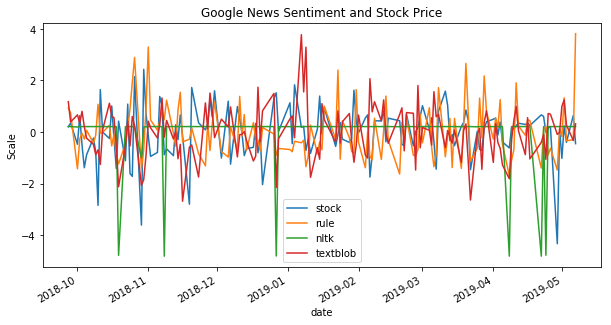

In [13]:
#Plot the Data
comp_sent.plot_data(google, "std", 0, 145, techniques)
plt.title("Google News Sentiment and Stock Price")
plt.ylabel("Scale")
plt.show()

In [28]:
data = google

In [34]:
data.head()

,liststring,delta,rule,nltk,textblob
time,,,,,
2018-09-27,"MANCHESTER,England,It,was,past,midnight,when,J...",5.14,430,0.9999,0.120413
2018-09-28,"You,may,have,noticed,a,bold,advertisement,in,T...",8.02,401,0.9999,0.105817
2018-10-01,"A,new,sitcom,airs,on,CBS,while,a,new,documenta...",-8.93,76,0.9934,0.110957
2018-10-02,"Student,Athlete,a,documentary,with,LeBron,Jame...",14.04,249,0.9998,0.104954
2018-10-03,"Apple,opened,a,routine,product,launch,event,la...",-9.67,283,0.9999,0.113497


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [57]:
def get_metrics(data, loss_func, techniques):
    scale = preprocessing.QuantileTransformer(n_quantiles=10, random_state=0)
    X = data.drop(columns="liststring")
    x_scale = pd.DataFrame(scale.fit_transform(X.values))
    x_scale.rename(columns=comp_sent.get_technique_ordering(techniques), inplace=True)
    for tech in techniques:
        print("Loss for func " + loss_func.__name__ + " on " + tech + ":", loss_func(x_scale["stock"], x_scale[tech]))

In [58]:
get_metrics(data, mean_squared_error, techniques)

Loss for func mean_squared_error on nltk: 0.17686233185494235
Loss for func mean_squared_error on textblob: 0.17022235701729824
Loss for func mean_squared_error on rule: 0.15173387644625017


In [59]:
get_metrics(data, mean_absolute_error, techniques)

Loss for func mean_absolute_error on nltk: 0.3385665576664184
Loss for func mean_absolute_error on textblob: 0.33746341125820684
Loss for func mean_absolute_error on rule: 0.31718301149740974
